In [797]:
import numpy as np
import yfinance as yf
import mplfinance as mpf

btc = yf.Ticker('BTC-USD')

btc_hist = btc.history(period='1mo', interval='1h')

# drop the columns that are not needed
btc_hist.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

print(len(btc_hist))

btc_hist

721


,Open,High,Low,Close,Volume
Datetime,,,,,
2024-06-14 19:00:00+00:00,65481.652344,65631.421875,65280.335938,65513.093750,0
2024-06-14 20:00:00+00:00,65475.972656,65935.296875,65475.972656,65717.992188,277993472
2024-06-14 21:00:00+00:00,65733.929688,66530.304688,65719.703125,66195.812500,1039919104
2024-06-14 22:00:00+00:00,66176.414062,66180.554688,65893.609375,65979.484375,517849088
2024-06-14 23:00:00+00:00,65978.070312,66039.132812,65880.546875,66010.328125,31709184
...,...,...,...,...,...
2024-07-14 15:00:00+00:00,60069.761719,60148.281250,59908.773438,60115.500000,178329600
2024-07-14 16:00:00+00:00,60101.933594,60118.730469,59933.570312,60078.839844,53305344
2024-07-14 17:00:00+00:00,60108.148438,60164.968750,59964.628906,60023.734375,206266368


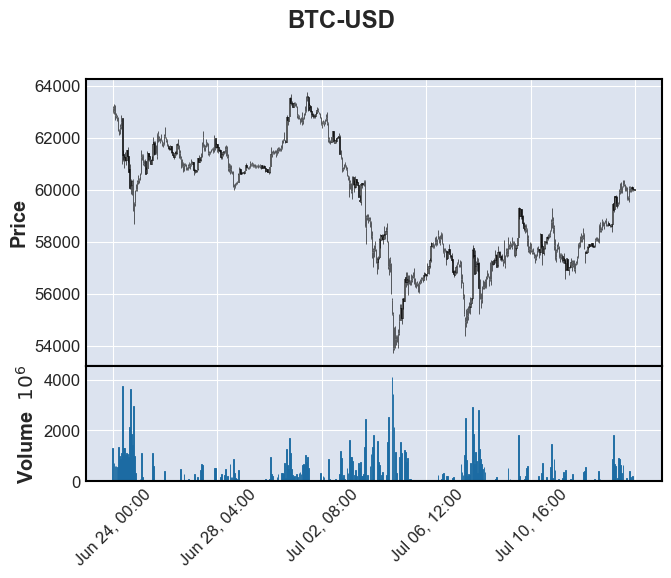

In [798]:
mpf.plot(btc_hist[-500:], type='candle', volume=True, title='BTC-USD')

In [799]:
# compute most popular indicators using ta library.
import pandas as pd
import pandas_ta as ta

btc_hist.set_index(pd.DatetimeIndex(btc_hist.index), inplace=True)

# # moving averages
btc_hist.ta.sma(length=10, append=True)
btc_hist.ta.sma(length=50, append=True)
btc_hist.ta.sma(length=200, append=True)

# exponential moving averages
btc_hist.ta.ema(length=10, append=True)
btc_hist.ta.ema(length=50, append=True)
btc_hist.ta.ema(length=200, append=True)

# RSI
btc_hist.ta.rsi(length=14, append=True)

# MACD
btc_hist.ta.macd(append=True)

# Bollinger Bands
btc_hist.ta.bbands(append=True)

# ATR
btc_hist.ta.atr(append=True)

# ADX
btc_hist.ta.adx(append=True)

# Stochastics
btc_hist.ta.stoch(append=True)
btc_hist.ta.stochrsi(append=True)

# also add for each time frame the indicators of the previous time frame
btc_hist['SMA_10_prev'] = btc_hist['SMA_10'].shift(1)
btc_hist['SMA_50_prev'] = btc_hist['SMA_50'].shift(1)
btc_hist['SMA_200_prev'] = btc_hist['SMA_200'].shift(1)
btc_hist['EMA_10_prev'] = btc_hist['EMA_10'].shift(1)
btc_hist['EMA_50_prev'] = btc_hist['EMA_50'].shift(1)
btc_hist['EMA_200_prev'] = btc_hist['EMA_200'].shift(1)
btc_hist['RSI_14_prev'] = btc_hist['RSI_14'].shift(1)
btc_hist['MACD_12_26_9_prev'] = btc_hist['MACD_12_26_9'].shift(1)
btc_hist['MACDh_12_26_9_prev'] = btc_hist['MACDh_12_26_9'].shift(1)
btc_hist['MACDs_12_26_9_prev'] = btc_hist['MACDs_12_26_9'].shift(1)
btc_hist['BBM_5_2.0_prev'] = btc_hist['BBM_5_2.0'].shift(1)
btc_hist['BBU_5_2.0_prev'] = btc_hist['BBU_5_2.0'].shift(1)
btc_hist['BBL_5_2.0_prev'] = btc_hist['BBL_5_2.0'].shift(1)
btc_hist['ATRr_14_prev'] = btc_hist['ATRr_14'].shift(1)
btc_hist['ADX_14_prev'] = btc_hist['ADX_14'].shift(1)
btc_hist['STOCHk_14_3_3_prev'] = btc_hist['STOCHk_14_3_3'].shift(1)
btc_hist['STOCHd_14_3_3_prev'] = btc_hist['STOCHd_14_3_3'].shift(1)
btc_hist['STOCHRSIk_14_14_3_3_prev'] = btc_hist['STOCHRSIk_14_14_3_3'].shift(1)
btc_hist['STOCHRSId_14_14_3_3_prev'] = btc_hist['STOCHRSId_14_14_3_3'].shift(1)

btc_hist

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-14 19:00:00+00:00,65481.652344,65631.421875,65280.335938,65513.093750,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 20:00:00+00:00,65475.972656,65935.296875,65475.972656,65717.992188,277993472,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 21:00:00+00:00,65733.929688,66530.304688,65719.703125,66195.812500,1039919104,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 22:00:00+00:00,66176.414062,66180.554688,65893.609375,65979.484375,517849088,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-14 23:00:00+00:00,65978.070312,66039.132812,65880.546875,66010.328125,31709184,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 15:00:00+00:00,60069.761719,60148.281250,59908.773438,60115.500000,178329600,60005.216797,58815.284063,57740.528594,59925.743440,59027.211301,...,418.727300,59897.935937,60277.334989,59518.536886,342.243106,49.352782,49.317585,57.287387,13.202997,10.958230
2024-07-14 16:00:00+00:00,60101.933594,60118.730469,59933.570312,60078.839844,53305344,60025.428906,58860.662969,57758.114453,59953.579150,59068.451636,...,407.729279,59928.835938,60346.938839,59510.733036,334.904871,48.891041,61.372526,55.225596,25.460487,15.687829
2024-07-14 17:00:00+00:00,60108.148438,60164.968750,59964.628906,60023.734375,206266368,60015.547266,58896.170625,57774.613164,59966.334645,59105.913704,...,396.634553,59921.492969,60327.330601,59515.655336,324.208820,48.462282,70.776007,60.488706,34.040889,24.234791


In [800]:
dataset = btc_hist.copy()

First row index: 2024-06-23 03:00:00+00:00


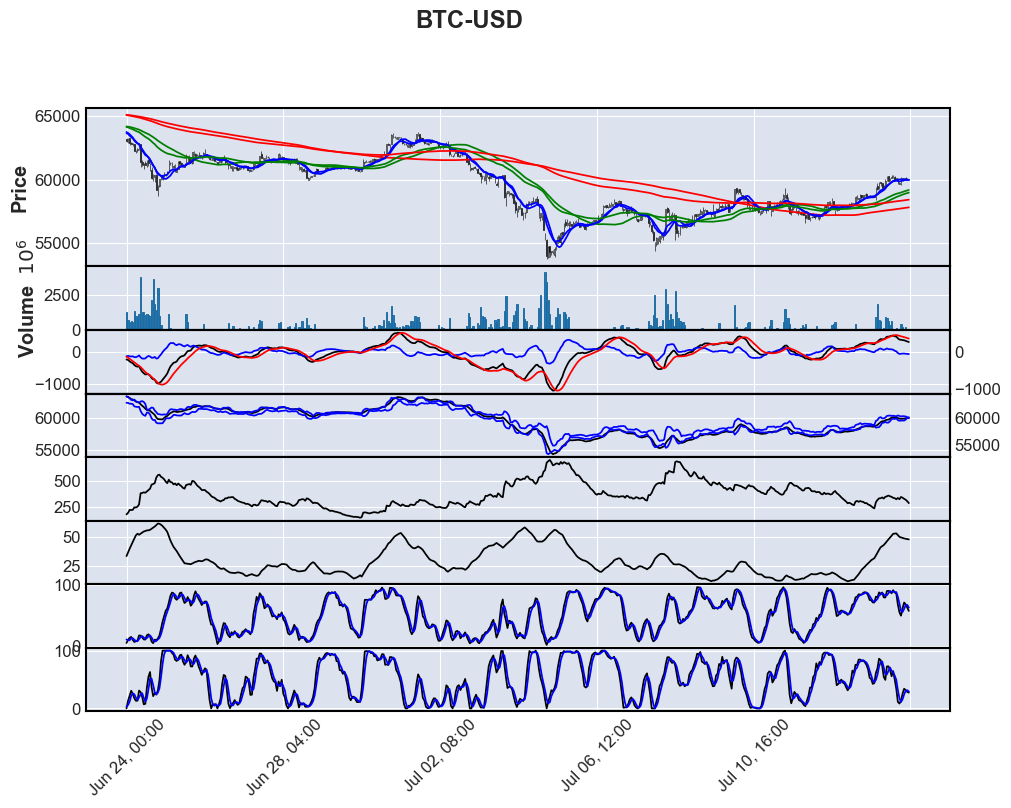

In [801]:
# find the first row index that has no NaN values. Similar to first_valid_index but return the row where all columns are not NaN
first_row = dataset.notnull().all(axis=1).idxmax()

print(f'First row index: {first_row}')

# drop the preceding rows
dataset = dataset.loc[first_row:]

to_plot = dataset[-500:]

# plot the data with the SMAs and EMAs, taking full screen width
mpf.plot(to_plot, type='candle', volume=True, title='BTC-USD', addplot=[
    mpf.make_addplot(to_plot['SMA_10'], color='blue'),
    mpf.make_addplot(to_plot['SMA_50'], color='green'),
    mpf.make_addplot(to_plot['SMA_200'], color='red'),
    mpf.make_addplot(to_plot['EMA_10'], color='blue'),
    mpf.make_addplot(to_plot['EMA_50'], color='green'),
    mpf.make_addplot(to_plot['EMA_200'], color='red'),
    mpf.make_addplot(to_plot['RSI_14'], panel=1, color='black'),
    mpf.make_addplot(to_plot['MACD_12_26_9'], panel=2, color='black'),
    mpf.make_addplot(to_plot['MACDh_12_26_9'], panel=2, color='blue'),
    mpf.make_addplot(to_plot['MACDs_12_26_9'], panel=2, color='red'),
    mpf.make_addplot(to_plot['BBM_5_2.0'], panel=3, color='black'),
    mpf.make_addplot(to_plot['BBU_5_2.0'], panel=3, color='blue'),
    mpf.make_addplot(to_plot['BBL_5_2.0'], panel=3, color='blue'),
    mpf.make_addplot(to_plot['ATRr_14'], panel=4, color='black'),
    mpf.make_addplot(to_plot['ADX_14'], panel=5, color='black'),
    mpf.make_addplot(to_plot['STOCHk_14_3_3'], panel=6, color='black'),
    mpf.make_addplot(to_plot['STOCHd_14_3_3'], panel=6, color='blue'),
    mpf.make_addplot(to_plot['STOCHRSIk_14_14_3_3'], panel=7, color='black'),
    mpf.make_addplot(to_plot['STOCHRSId_14_14_3_3'], panel=7, color='blue'),
], figscale=1.5)

In [802]:
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-23 03:00:00+00:00,64479.402344,64489.140625,64411.285156,64411.285156,0,64343.358594,64201.234219,65334.060332,64364.879552,64381.832865,...,14.741418,64379.356250,64551.298878,64207.413622,132.471269,12.947799,84.869334,69.711457,96.737135,74.654251
2024-06-23 04:00:00+00:00,64402.808594,64408.843750,64353.843750,64356.375000,0,64351.282031,64193.354375,65327.252246,64363.333270,64380.834518,...,19.622571,64403.500781,64550.947496,64256.054067,128.570139,14.279664,80.159460,77.288802,86.109939,84.098693
2024-06-23 05:00:00+00:00,64353.199219,64397.074219,64333.359375,64354.359375,0,64359.762891,64188.793125,65318.044980,64361.701653,64379.796277,...,22.988611,64422.909375,64496.276454,64349.542296,123.489514,14.743432,67.464942,77.497912,63.470742,82.105939
2024-06-23 06:00:00+00:00,64353.894531,64384.386719,64344.078125,64354.757812,0,64368.363281,64183.623125,65309.921348,64360.439136,64378.814376,...,25.144000,64404.789844,64491.044474,64318.535213,119.219893,14.909974,56.334847,67.986416,43.653417,64.411366
2024-06-23 07:00:00+00:00,64354.746094,64406.855469,64351.652344,64385.894531,0,64375.945312,64178.892656,65301.799180,64365.067390,64379.092029,...,26.376635,64384.091406,64457.863574,64310.319239,113.583370,15.064620,49.291044,57.696944,31.285168,46.136443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 15:00:00+00:00,60069.761719,60148.281250,59908.773438,60115.500000,178329600,60005.216797,58815.284063,57740.528594,59925.743440,59027.211301,...,418.727300,59897.935937,60277.334989,59518.536886,342.243106,49.352782,49.317585,57.287387,13.202997,10.958230
2024-07-14 16:00:00+00:00,60101.933594,60118.730469,59933.570312,60078.839844,53305344,60025.428906,58860.662969,57758.114453,59953.579150,59068.451636,...,407.729279,59928.835938,60346.938839,59510.733036,334.904871,48.891041,61.372526,55.225596,25.460487,15.687829
2024-07-14 17:00:00+00:00,60108.148438,60164.968750,59964.628906,60023.734375,206266368,60015.547266,58896.170625,57774.613164,59966.334645,59105.913704,...,396.634553,59921.492969,60327.330601,59515.655336,324.208820,48.462282,70.776007,60.488706,34.040889,24.234791


In [803]:
# add a new column to the dataset that is the close value of the next row. This will be used to predict the next close value.
dataset['Next Close'] = dataset['Close'].shift(-1)
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev,Next Close
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-23 03:00:00+00:00,64479.402344,64489.140625,64411.285156,64411.285156,0,64343.358594,64201.234219,65334.060332,64364.879552,64381.832865,...,64379.356250,64551.298878,64207.413622,132.471269,12.947799,84.869334,69.711457,96.737135,74.654251,64356.375000
2024-06-23 04:00:00+00:00,64402.808594,64408.843750,64353.843750,64356.375000,0,64351.282031,64193.354375,65327.252246,64363.333270,64380.834518,...,64403.500781,64550.947496,64256.054067,128.570139,14.279664,80.159460,77.288802,86.109939,84.098693,64354.359375
2024-06-23 05:00:00+00:00,64353.199219,64397.074219,64333.359375,64354.359375,0,64359.762891,64188.793125,65318.044980,64361.701653,64379.796277,...,64422.909375,64496.276454,64349.542296,123.489514,14.743432,67.464942,77.497912,63.470742,82.105939,64354.757812
2024-06-23 06:00:00+00:00,64353.894531,64384.386719,64344.078125,64354.757812,0,64368.363281,64183.623125,65309.921348,64360.439136,64378.814376,...,64404.789844,64491.044474,64318.535213,119.219893,14.909974,56.334847,67.986416,43.653417,64.411366,64385.894531
2024-06-23 07:00:00+00:00,64354.746094,64406.855469,64351.652344,64385.894531,0,64375.945312,64178.892656,65301.799180,64365.067390,64379.092029,...,64384.091406,64457.863574,64310.319239,113.583370,15.064620,49.291044,57.696944,31.285168,46.136443,64347.546875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 15:00:00+00:00,60069.761719,60148.281250,59908.773438,60115.500000,178329600,60005.216797,58815.284063,57740.528594,59925.743440,59027.211301,...,59897.935937,60277.334989,59518.536886,342.243106,49.352782,49.317585,57.287387,13.202997,10.958230,60078.839844
2024-07-14 16:00:00+00:00,60101.933594,60118.730469,59933.570312,60078.839844,53305344,60025.428906,58860.662969,57758.114453,59953.579150,59068.451636,...,59928.835938,60346.938839,59510.733036,334.904871,48.891041,61.372526,55.225596,25.460487,15.687829,60023.734375
2024-07-14 17:00:00+00:00,60108.148438,60164.968750,59964.628906,60023.734375,206266368,60015.547266,58896.170625,57774.613164,59966.334645,59105.913704,...,59921.492969,60327.330601,59515.655336,324.208820,48.462282,70.776007,60.488706,34.040889,24.234791,60042.632812


In [804]:
print(f'Number of NaN values in the dataset: {dataset.isnull().sum().sum()}')

# drop the last row as it has NaN values
dataset.dropna(inplace=True)

print(f'Number of NaN values in the dataset after dropping: {dataset.isnull().sum().sum()}')

dataset

Number of NaN values in the dataset: 1
Number of NaN values in the dataset after dropping: 0


,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev,Next Close
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-23 03:00:00+00:00,64479.402344,64489.140625,64411.285156,64411.285156,0,64343.358594,64201.234219,65334.060332,64364.879552,64381.832865,...,64379.356250,64551.298878,64207.413622,132.471269,12.947799,84.869334,69.711457,96.737135,74.654251,64356.375000
2024-06-23 04:00:00+00:00,64402.808594,64408.843750,64353.843750,64356.375000,0,64351.282031,64193.354375,65327.252246,64363.333270,64380.834518,...,64403.500781,64550.947496,64256.054067,128.570139,14.279664,80.159460,77.288802,86.109939,84.098693,64354.359375
2024-06-23 05:00:00+00:00,64353.199219,64397.074219,64333.359375,64354.359375,0,64359.762891,64188.793125,65318.044980,64361.701653,64379.796277,...,64422.909375,64496.276454,64349.542296,123.489514,14.743432,67.464942,77.497912,63.470742,82.105939,64354.757812
2024-06-23 06:00:00+00:00,64353.894531,64384.386719,64344.078125,64354.757812,0,64368.363281,64183.623125,65309.921348,64360.439136,64378.814376,...,64404.789844,64491.044474,64318.535213,119.219893,14.909974,56.334847,67.986416,43.653417,64.411366,64385.894531
2024-06-23 07:00:00+00:00,64354.746094,64406.855469,64351.652344,64385.894531,0,64375.945312,64178.892656,65301.799180,64365.067390,64379.092029,...,64384.091406,64457.863574,64310.319239,113.583370,15.064620,49.291044,57.696944,31.285168,46.136443,64347.546875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 14:00:00+00:00,59716.968750,60172.742188,59546.605469,60061.117188,408565760,60020.517969,58771.700859,57722.896777,59883.575316,58982.791354,...,59933.366406,60391.930944,59474.801868,320.405136,49.850041,54.986677,69.392481,8.400002,17.885979,60115.500000
2024-07-14 15:00:00+00:00,60069.761719,60148.281250,59908.773438,60115.500000,178329600,60005.216797,58815.284063,57740.528594,59925.743440,59027.211301,...,59897.935937,60277.334989,59518.536886,342.243106,49.352782,49.317585,57.287387,13.202997,10.958230,60078.839844
2024-07-14 16:00:00+00:00,60101.933594,60118.730469,59933.570312,60078.839844,53305344,60025.428906,58860.662969,57758.114453,59953.579150,59068.451636,...,59928.835938,60346.938839,59510.733036,334.904871,48.891041,61.372526,55.225596,25.460487,15.687829,60023.734375


In [805]:
# add a new column to the dataset that is the percentage change of the close value of the next row.
dataset['Expected Change'] = (dataset['Next Close'] - dataset['Close']) / dataset['Close']
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev,Next Close,Expected Change
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-23 03:00:00+00:00,64479.402344,64489.140625,64411.285156,64411.285156,0,64343.358594,64201.234219,65334.060332,64364.879552,64381.832865,...,64551.298878,64207.413622,132.471269,12.947799,84.869334,69.711457,96.737135,74.654251,64356.375000,-0.000852
2024-06-23 04:00:00+00:00,64402.808594,64408.843750,64353.843750,64356.375000,0,64351.282031,64193.354375,65327.252246,64363.333270,64380.834518,...,64550.947496,64256.054067,128.570139,14.279664,80.159460,77.288802,86.109939,84.098693,64354.359375,-0.000031
2024-06-23 05:00:00+00:00,64353.199219,64397.074219,64333.359375,64354.359375,0,64359.762891,64188.793125,65318.044980,64361.701653,64379.796277,...,64496.276454,64349.542296,123.489514,14.743432,67.464942,77.497912,63.470742,82.105939,64354.757812,0.000006
2024-06-23 06:00:00+00:00,64353.894531,64384.386719,64344.078125,64354.757812,0,64368.363281,64183.623125,65309.921348,64360.439136,64378.814376,...,64491.044474,64318.535213,119.219893,14.909974,56.334847,67.986416,43.653417,64.411366,64385.894531,0.000484
2024-06-23 07:00:00+00:00,64354.746094,64406.855469,64351.652344,64385.894531,0,64375.945312,64178.892656,65301.799180,64365.067390,64379.092029,...,64457.863574,64310.319239,113.583370,15.064620,49.291044,57.696944,31.285168,46.136443,64347.546875,-0.000596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 14:00:00+00:00,59716.968750,60172.742188,59546.605469,60061.117188,408565760,60020.517969,58771.700859,57722.896777,59883.575316,58982.791354,...,60391.930944,59474.801868,320.405136,49.850041,54.986677,69.392481,8.400002,17.885979,60115.500000,0.000905
2024-07-14 15:00:00+00:00,60069.761719,60148.281250,59908.773438,60115.500000,178329600,60005.216797,58815.284063,57740.528594,59925.743440,59027.211301,...,60277.334989,59518.536886,342.243106,49.352782,49.317585,57.287387,13.202997,10.958230,60078.839844,-0.000610
2024-07-14 16:00:00+00:00,60101.933594,60118.730469,59933.570312,60078.839844,53305344,60025.428906,58860.662969,57758.114453,59953.579150,59068.451636,...,60346.938839,59510.733036,334.904871,48.891041,61.372526,55.225596,25.460487,15.687829,60023.734375,-0.000917


In [870]:
# start of the ML part
# goal is to predict the 'Expected Change' column using the other columns in the dataset (except 'Next Close' column).
# the model will perform a regression task.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split the dataset into features and target
X = dataset.drop(columns=['Next Close', 'Expected Change'])

# target
Y = dataset['Expected Change']

In [871]:
X

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-23 03:00:00+00:00,64479.402344,64489.140625,64411.285156,64411.285156,0,64343.358594,64201.234219,65334.060332,64364.879552,64381.832865,...,14.741418,64379.356250,64551.298878,64207.413622,132.471269,12.947799,84.869334,69.711457,96.737135,74.654251
2024-06-23 04:00:00+00:00,64402.808594,64408.843750,64353.843750,64356.375000,0,64351.282031,64193.354375,65327.252246,64363.333270,64380.834518,...,19.622571,64403.500781,64550.947496,64256.054067,128.570139,14.279664,80.159460,77.288802,86.109939,84.098693
2024-06-23 05:00:00+00:00,64353.199219,64397.074219,64333.359375,64354.359375,0,64359.762891,64188.793125,65318.044980,64361.701653,64379.796277,...,22.988611,64422.909375,64496.276454,64349.542296,123.489514,14.743432,67.464942,77.497912,63.470742,82.105939
2024-06-23 06:00:00+00:00,64353.894531,64384.386719,64344.078125,64354.757812,0,64368.363281,64183.623125,65309.921348,64360.439136,64378.814376,...,25.144000,64404.789844,64491.044474,64318.535213,119.219893,14.909974,56.334847,67.986416,43.653417,64.411366
2024-06-23 07:00:00+00:00,64354.746094,64406.855469,64351.652344,64385.894531,0,64375.945312,64178.892656,65301.799180,64365.067390,64379.092029,...,26.376635,64384.091406,64457.863574,64310.319239,113.583370,15.064620,49.291044,57.696944,31.285168,46.136443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-14 14:00:00+00:00,59716.968750,60172.742188,59546.605469,60061.117188,408565760,60020.517969,58771.700859,57722.896777,59883.575316,58982.791354,...,431.067016,59933.366406,60391.930944,59474.801868,320.405136,49.850041,54.986677,69.392481,8.400002,17.885979
2024-07-14 15:00:00+00:00,60069.761719,60148.281250,59908.773438,60115.500000,178329600,60005.216797,58815.284063,57740.528594,59925.743440,59027.211301,...,418.727300,59897.935937,60277.334989,59518.536886,342.243106,49.352782,49.317585,57.287387,13.202997,10.958230
2024-07-14 16:00:00+00:00,60101.933594,60118.730469,59933.570312,60078.839844,53305344,60025.428906,58860.662969,57758.114453,59953.579150,59068.451636,...,407.729279,59928.835938,60346.938839,59510.733036,334.904871,48.891041,61.372526,55.225596,25.460487,15.687829


In [872]:
Y

Datetime
2024-06-23 03:00:00+00:00   -0.000852
2024-06-23 04:00:00+00:00   -0.000031
2024-06-23 05:00:00+00:00    0.000006
2024-06-23 06:00:00+00:00    0.000484
2024-06-23 07:00:00+00:00   -0.000596
                               ...   
2024-07-14 14:00:00+00:00    0.000905
2024-07-14 15:00:00+00:00   -0.000610
2024-07-14 16:00:00+00:00   -0.000917
2024-07-14 17:00:00+00:00    0.000315
2024-07-14 18:00:00+00:00   -0.000731
Name: Expected Change, Length: 520, dtype: float64

In [895]:
# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [896]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (468, 47)
X_test shape: (52, 47)
Y_train shape: (468,)
Y_test shape: (52,)


In [897]:
X_train

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-26 07:00:00+00:00,61567.285156,61730.949219,61535.207031,61697.007812,0,61808.094141,61237.080469,63772.849883,61742.868816,61764.089066,...,148.369962,61768.557031,62123.548156,61413.565907,351.798225,28.376349,34.810869,45.690210,0.000000,17.824949
2024-07-11 18:00:00+00:00,57800.660156,57989.402344,57717.746094,57828.812500,109023232,58133.777734,58035.198672,57439.254961,57955.021110,57876.580995,...,66.388872,57839.956250,58614.448324,57065.464176,464.935926,13.769143,20.902430,26.703214,17.743927,16.630930
2024-07-07 16:00:00+00:00,56831.457031,57128.996094,56778.054688,57052.792969,0,57250.824609,57130.435547,59683.597930,57203.356171,57331.192424,...,87.601472,57048.607031,57612.846244,56484.367819,326.302912,24.396007,7.015319,10.128788,2.138770,1.309832
2024-06-29 07:00:00+00:00,60752.429688,61027.710938,60752.429688,60946.761719,0,60634.343359,61139.568594,62316.811777,60706.130992,61018.789288,...,-206.963220,60676.619531,60753.920591,60599.318472,229.548868,18.186983,71.809790,60.969585,90.320141,86.418189
2024-07-11 17:00:00+00:00,57648.222656,57916.625000,57620.097656,57824.976562,2039808,58166.665234,58031.953984,57451.462813,57983.067467,57878.530730,...,82.580433,58035.742969,59126.474104,56945.011833,477.890433,14.611111,23.005425,39.324818,8.879960,29.583701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 02:00:00+00:00,62066.664062,62434.136719,62014.109375,62030.765625,24152064,61908.005859,61348.693516,63894.068770,61848.248576,61778.878800,...,132.134110,61885.939844,62101.034347,61670.845340,408.523026,29.194658,70.229909,69.752046,63.473183,62.483573
2024-06-27 13:00:00+00:00,61271.289062,61844.527344,61271.289062,61844.527344,684787712,61067.036719,61384.098984,63164.996387,61194.324833,61314.560970,...,-123.767677,61099.285937,61466.890116,60731.681759,264.442968,16.402391,74.095675,72.953268,86.122359,79.935930
2024-07-04 09:00:00+00:00,57630.785156,57773.207031,57043.957031,57685.753906,1827033088,58717.062109,60708.564297,61376.371250,58611.037326,60329.510347,...,-587.178566,58485.678125,59533.037978,57438.318272,502.955633,51.146009,17.283349,27.008041,9.421382,20.781608


In [914]:
from sklearn.preprocessing import StandardScaler

# scale the features
scaler = StandardScaler()

# scale while keeping the column names and datetime
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# the LSTM expects a 3D input, so reshape the data
# X_train_scaled = X_train_scaled.values.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
# X_test_scaled = X_test_scaled.values.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [915]:
X_train_scaled

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-26 07:00:00+00:00,0.820522,0.831778,0.873298,0.881924,-0.550438,0.909979,0.573575,1.160883,0.888317,0.811188,...,0.692084,0.897739,0.884516,0.894602,-0.089752,-0.010842,-0.496421,-0.110948,-1.528373,-1.017295
2024-07-11 18:00:00+00:00,-0.771041,-0.781804,-0.717280,-0.765538,-0.349748,-0.645198,-0.762586,-1.416373,-0.726821,-0.859534,...,0.436638,-0.760989,-0.640192,-0.860114,0.797201,-1.136213,-0.986505,-0.797565,-0.982607,-1.055312
2024-07-07 16:00:00+00:00,-1.180571,-1.152863,-1.108810,-1.096045,-0.550438,-1.018914,-1.140148,-0.503109,-1.047331,-1.093924,...,0.502735,-1.095111,-1.075390,-1.094621,-0.289625,-0.317496,-1.475837,-1.396938,-1.462589,-1.543132
2024-06-29 07:00:00+00:00,0.476210,0.528499,0.547147,0.562395,-0.550438,0.413182,0.532883,0.568394,0.446252,0.490883,...,-0.415102,0.436703,0.289411,0.566005,-1.048136,-0.795853,0.807290,0.441592,1.249688,1.166697
2024-07-11 17:00:00+00:00,-0.835452,-0.813190,-0.757966,-0.767172,-0.546683,-0.631279,-0.763940,-1.411406,-0.714862,-0.858696,...,0.487090,-0.678324,-0.417716,-0.908723,0.898759,-1.071345,-0.912403,-0.341137,-1.255244,-0.642899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 02:00:00+00:00,1.031531,1.135035,1.072836,1.024072,-0.505979,0.952268,0.620152,1.210209,0.933250,0.817544,...,0.641495,0.947301,0.874734,0.998430,0.354947,0.052202,0.751621,0.759187,0.423931,0.404625
2024-06-27 13:00:00+00:00,0.695451,0.880759,0.763334,0.944753,0.710118,0.596322,0.634926,0.913536,0.654418,0.617996,...,-0.155872,0.615161,0.599198,0.619422,-0.774581,-0.933341,0.887837,0.874951,1.120573,0.960304
2024-07-04 09:00:00+00:00,-0.842820,-0.875040,-0.998020,-0.826467,2.812762,-0.398320,0.353023,0.185712,-0.447096,0.194654,...,-1.599819,-0.488353,-0.241064,-0.709645,1.095260,1.743382,-1.114028,-0.786542,-1.238591,-0.923155


In [916]:
X_test_scaled

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-07-04 14:00:00+00:00,-0.955345,-1.016003,-1.034484,-0.957120,0.828468,-0.759139,0.137435,0.142298,-0.760118,-0.026554,...,-2.090400,-0.878204,-0.873408,-0.867574,1.213490,2.199501,-1.254137,-1.150047,-1.136811,-1.118164
2024-06-27 00:00:00+00:00,0.501054,0.513137,0.552113,0.559194,-0.352900,0.582013,0.620306,1.020231,0.590857,0.687372,...,-0.104786,0.543330,0.446368,0.624056,-0.462004,-0.725125,-1.198550,-1.061243,-1.340262,-1.269683
2024-06-23 09:00:00+00:00,1.998442,1.980822,2.048179,2.023740,-0.550438,2.004271,1.800806,1.775890,2.006309,1.934500,...,0.315688,1.991805,1.867810,2.072761,-2.026432,-0.991780,0.113511,0.097714,-0.457177,-0.482771
2024-06-30 02:00:00+00:00,0.522632,0.457161,0.520673,0.467293,-0.398809,0.524445,0.459463,0.443474,0.516326,0.465785,...,0.235656,0.528164,0.380357,0.656373,-1.671574,-1.139375,-0.813406,-0.779250,-0.907771,-1.006324
2024-06-26 21:00:00+00:00,0.555622,0.525704,0.613104,0.579652,-0.487058,0.683398,0.594727,1.043240,0.652340,0.720744,...,0.069445,0.601660,0.532162,0.655875,-0.177749,-0.761225,-1.060396,-1.099227,-1.238151,-1.412366
2024-07-14 12:00:00+00:00,0.211000,0.140351,0.080715,0.003468,-0.452468,0.136860,-0.498829,-1.315120,0.090681,-0.416698,...,1.637908,0.205642,0.102166,0.298217,-0.338901,1.875336,1.294367,1.416253,-0.483027,-0.009770
2024-07-08 05:00:00+00:00,-1.746941,-1.773741,-1.731243,-1.745996,-0.079069,-1.632451,-1.182114,-0.630784,-1.654843,-1.324524,...,-0.926593,-1.854108,-1.921902,-1.759297,0.889648,0.472820,-0.564071,-0.838785,-0.344561,-0.822984
2024-07-02 15:00:00+00:00,0.972746,0.964291,0.994304,0.987142,-0.364949,1.209618,1.192688,0.248653,1.199181,1.134254,...,0.235605,1.224271,1.320631,1.113746,-0.519635,-0.600764,-0.678087,-0.421676,-0.789309,-0.512649
2024-07-01 03:00:00+00:00,1.579336,1.561541,1.606963,1.586542,0.338038,1.252745,0.618046,0.320201,1.310834,0.758528,...,1.372017,1.435218,1.574550,1.281159,-0.471441,1.543267,1.571353,1.648780,1.144356,1.223088


In [917]:
# # now the same process but with a neural network (use MLPRegressor)
# from sklearn.neural_network import MLPRegressor
#
# # create the model
# model = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=100000, random_state=42, alpha=0.0001,
#                      learning_rate_init=0.001, learning_rate='constant', tol=1e-4, n_iter_no_change=10,
#                      validation_fraction=0.1,
#                      early_stopping=True,
#                      activation='tanh',
#                      solver='adam',
#                      verbose=0
#                      )
#
# # train the model
# model.fit(X_train_scaled, Y_train)
#
# # print number of iterations
# print(f'Number of iterations: {model.n_iter_}')

In [918]:
# import os
# import numpy as np
#
# space = np.logspace(-2, -5, 10)
#
# pd.Series(space)

In [919]:
# parameter_space = {
#     'hidden_layer_sizes': [(20, 20)],
#     'activation': ['tanh'],
#     'solver': ['adam'],
#     'learning_rate_init': space
# }
#
# from sklearn.model_selection import GridSearchCV
#
# cpu_count = os.cpu_count()
# print(f'Number of CPUs: {cpu_count}')
#
# clf = GridSearchCV(model, parameter_space, n_jobs=cpu_count-1, verbose=2)
# clf.fit(X_train_scaled, Y_train)
#
# print(f'Best parameters found: {clf.best_params_}')

In [920]:
# # plot the training loss, use log scale for y-axis
# # also add the validation scores
# import matplotlib.pyplot as plt
#
# plt.yscale('log')
# plt.xlabel('Number of Iterations')
# plt.title('Training Loss Curve')
#
# plt.plot(model.loss_curve_, label='Training Loss')
# plt.legend()
# plt.show()
#
# # also plot the validation scores
# plt.yscale('log')
# plt.xlabel('Number of Iterations')
# plt.title('Validation Scores')
#
# # opposite the validation scores
# values = [1 - x for x in model.validation_scores_]
#
# plt.plot(values, label='Validation Scores')
# plt.legend()
# plt.show()

In [921]:
# # make predictions
# predictions = model.predict(X_test_scaled)
#
# # calculate the mean squared error
# mse = mean_squared_error(Y_test, predictions)
# print(f'Mean Squared Error: {mse}')
#
# pd.Series(predictions, name='Predictions')


In [922]:
# # plot the predictions vs the actual values as a scatter plot. Use the same scale for both axes.
# import matplotlib.pyplot as plt
#
# assert len(Y_test) == len(predictions)
#
# plt.scatter(Y_test, predictions)
# plt.xlabel('Actual Values')
# plt.ylabel('Predictions')
# plt.title('Actual vs Predicted Values')
#
# global_min = min(min(Y_test), min(predictions))
# global_max = max(max(Y_test), max(predictions))
#
# plt.xlim(global_min, global_max)
# plt.ylim(global_min, global_max)
#
# plt.plot([global_min, global_max], [global_min, global_max], color='red')
#
# plt.show()


In [923]:
# # show expected and predicted values as a dataframe
# df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions})
#
# # add a percentage of error column
# df['Error %'] = np.abs((df['Expected'] - df['Predicted']) / df['Expected']) * 100
#
# # format percentage of error column
# df['Error %'] = df['Error %'].map('{:.2f}%'.format)
#
# df

In [927]:
import tensorflow as tf

# import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

# now train a model using keras and tensorflow on mac m1

input_count = X_train_scaled.shape[1]
print(f'Number of input features: {input_count}')

Number of input features: 47


In [928]:
X_train_scaled

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-26 07:00:00+00:00,0.820522,0.831778,0.873298,0.881924,-0.550438,0.909979,0.573575,1.160883,0.888317,0.811188,...,0.692084,0.897739,0.884516,0.894602,-0.089752,-0.010842,-0.496421,-0.110948,-1.528373,-1.017295
2024-07-11 18:00:00+00:00,-0.771041,-0.781804,-0.717280,-0.765538,-0.349748,-0.645198,-0.762586,-1.416373,-0.726821,-0.859534,...,0.436638,-0.760989,-0.640192,-0.860114,0.797201,-1.136213,-0.986505,-0.797565,-0.982607,-1.055312
2024-07-07 16:00:00+00:00,-1.180571,-1.152863,-1.108810,-1.096045,-0.550438,-1.018914,-1.140148,-0.503109,-1.047331,-1.093924,...,0.502735,-1.095111,-1.075390,-1.094621,-0.289625,-0.317496,-1.475837,-1.396938,-1.462589,-1.543132
2024-06-29 07:00:00+00:00,0.476210,0.528499,0.547147,0.562395,-0.550438,0.413182,0.532883,0.568394,0.446252,0.490883,...,-0.415102,0.436703,0.289411,0.566005,-1.048136,-0.795853,0.807290,0.441592,1.249688,1.166697
2024-07-11 17:00:00+00:00,-0.835452,-0.813190,-0.757966,-0.767172,-0.546683,-0.631279,-0.763940,-1.411406,-0.714862,-0.858696,...,0.487090,-0.678324,-0.417716,-0.908723,0.898759,-1.071345,-0.912403,-0.341137,-1.255244,-0.642899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 02:00:00+00:00,1.031531,1.135035,1.072836,1.024072,-0.505979,0.952268,0.620152,1.210209,0.933250,0.817544,...,0.641495,0.947301,0.874734,0.998430,0.354947,0.052202,0.751621,0.759187,0.423931,0.404625
2024-06-27 13:00:00+00:00,0.695451,0.880759,0.763334,0.944753,0.710118,0.596322,0.634926,0.913536,0.654418,0.617996,...,-0.155872,0.615161,0.599198,0.619422,-0.774581,-0.933341,0.887837,0.874951,1.120573,0.960304
2024-07-04 09:00:00+00:00,-0.842820,-0.875040,-0.998020,-0.826467,2.812762,-0.398320,0.353023,0.185712,-0.447096,0.194654,...,-1.599819,-0.488353,-0.241064,-0.709645,1.095260,1.743382,-1.114028,-0.786542,-1.238591,-0.923155


In [929]:
Y_train

Datetime
2024-06-26 07:00:00+00:00   -0.003546
2024-07-11 18:00:00+00:00   -0.007233
2024-07-07 16:00:00+00:00    0.002713
2024-06-29 07:00:00+00:00   -0.001255
2024-07-11 17:00:00+00:00    0.000066
                               ...   
2024-06-26 02:00:00+00:00   -0.001821
2024-06-27 13:00:00+00:00   -0.002647
2024-07-04 09:00:00+00:00    0.003328
2024-07-11 06:00:00+00:00    0.003378
2024-06-27 09:00:00+00:00   -0.002965
Name: Expected Change, Length: 468, dtype: float64

In [930]:
X_train_scaled

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-26 07:00:00+00:00,0.820522,0.831778,0.873298,0.881924,-0.550438,0.909979,0.573575,1.160883,0.888317,0.811188,...,0.692084,0.897739,0.884516,0.894602,-0.089752,-0.010842,-0.496421,-0.110948,-1.528373,-1.017295
2024-07-11 18:00:00+00:00,-0.771041,-0.781804,-0.717280,-0.765538,-0.349748,-0.645198,-0.762586,-1.416373,-0.726821,-0.859534,...,0.436638,-0.760989,-0.640192,-0.860114,0.797201,-1.136213,-0.986505,-0.797565,-0.982607,-1.055312
2024-07-07 16:00:00+00:00,-1.180571,-1.152863,-1.108810,-1.096045,-0.550438,-1.018914,-1.140148,-0.503109,-1.047331,-1.093924,...,0.502735,-1.095111,-1.075390,-1.094621,-0.289625,-0.317496,-1.475837,-1.396938,-1.462589,-1.543132
2024-06-29 07:00:00+00:00,0.476210,0.528499,0.547147,0.562395,-0.550438,0.413182,0.532883,0.568394,0.446252,0.490883,...,-0.415102,0.436703,0.289411,0.566005,-1.048136,-0.795853,0.807290,0.441592,1.249688,1.166697
2024-07-11 17:00:00+00:00,-0.835452,-0.813190,-0.757966,-0.767172,-0.546683,-0.631279,-0.763940,-1.411406,-0.714862,-0.858696,...,0.487090,-0.678324,-0.417716,-0.908723,0.898759,-1.071345,-0.912403,-0.341137,-1.255244,-0.642899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 02:00:00+00:00,1.031531,1.135035,1.072836,1.024072,-0.505979,0.952268,0.620152,1.210209,0.933250,0.817544,...,0.641495,0.947301,0.874734,0.998430,0.354947,0.052202,0.751621,0.759187,0.423931,0.404625
2024-06-27 13:00:00+00:00,0.695451,0.880759,0.763334,0.944753,0.710118,0.596322,0.634926,0.913536,0.654418,0.617996,...,-0.155872,0.615161,0.599198,0.619422,-0.774581,-0.933341,0.887837,0.874951,1.120573,0.960304
2024-07-04 09:00:00+00:00,-0.842820,-0.875040,-0.998020,-0.826467,2.812762,-0.398320,0.353023,0.185712,-0.447096,0.194654,...,-1.599819,-0.488353,-0.241064,-0.709645,1.095260,1.743382,-1.114028,-0.786542,-1.238591,-0.923155


In [931]:
X_train_scaled_arr = X_train_scaled

X_train_scaled_arr

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,MACDs_12_26_9_prev,BBM_5_2.0_prev,BBU_5_2.0_prev,BBL_5_2.0_prev,ATRr_14_prev,ADX_14_prev,STOCHk_14_3_3_prev,STOCHd_14_3_3_prev,STOCHRSIk_14_14_3_3_prev,STOCHRSId_14_14_3_3_prev
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-26 07:00:00+00:00,0.820522,0.831778,0.873298,0.881924,-0.550438,0.909979,0.573575,1.160883,0.888317,0.811188,...,0.692084,0.897739,0.884516,0.894602,-0.089752,-0.010842,-0.496421,-0.110948,-1.528373,-1.017295
2024-07-11 18:00:00+00:00,-0.771041,-0.781804,-0.717280,-0.765538,-0.349748,-0.645198,-0.762586,-1.416373,-0.726821,-0.859534,...,0.436638,-0.760989,-0.640192,-0.860114,0.797201,-1.136213,-0.986505,-0.797565,-0.982607,-1.055312
2024-07-07 16:00:00+00:00,-1.180571,-1.152863,-1.108810,-1.096045,-0.550438,-1.018914,-1.140148,-0.503109,-1.047331,-1.093924,...,0.502735,-1.095111,-1.075390,-1.094621,-0.289625,-0.317496,-1.475837,-1.396938,-1.462589,-1.543132
2024-06-29 07:00:00+00:00,0.476210,0.528499,0.547147,0.562395,-0.550438,0.413182,0.532883,0.568394,0.446252,0.490883,...,-0.415102,0.436703,0.289411,0.566005,-1.048136,-0.795853,0.807290,0.441592,1.249688,1.166697
2024-07-11 17:00:00+00:00,-0.835452,-0.813190,-0.757966,-0.767172,-0.546683,-0.631279,-0.763940,-1.411406,-0.714862,-0.858696,...,0.487090,-0.678324,-0.417716,-0.908723,0.898759,-1.071345,-0.912403,-0.341137,-1.255244,-0.642899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 02:00:00+00:00,1.031531,1.135035,1.072836,1.024072,-0.505979,0.952268,0.620152,1.210209,0.933250,0.817544,...,0.641495,0.947301,0.874734,0.998430,0.354947,0.052202,0.751621,0.759187,0.423931,0.404625
2024-06-27 13:00:00+00:00,0.695451,0.880759,0.763334,0.944753,0.710118,0.596322,0.634926,0.913536,0.654418,0.617996,...,-0.155872,0.615161,0.599198,0.619422,-0.774581,-0.933341,0.887837,0.874951,1.120573,0.960304
2024-07-04 09:00:00+00:00,-0.842820,-0.875040,-0.998020,-0.826467,2.812762,-0.398320,0.353023,0.185712,-0.447096,0.194654,...,-1.599819,-0.488353,-0.241064,-0.709645,1.095260,1.743382,-1.114028,-0.786542,-1.238591,-0.923155


In [991]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
import keras

print(f'Shape of X_train_scaled_arr: {X_train_scaled_arr.shape}')

dropout = 0.1

# create the model, similar to the MLPRegressor model
model = keras.Sequential([
    keras.layers.Input(shape=(input_count,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dropout(dropout),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

# set the learning rate
model.optimizer.learning_rate = 0.0001

# train with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, min_delta=0)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# train it
model.fit(X_train_scaled_arr, Y_train, epochs=10000, validation_split=0.01, callbacks=[early_stopping])

Shape of X_train_scaled_arr: (468, 47)
Epoch 1/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0381 - val_loss: 0.0316
Epoch 2/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260 - val_loss: 0.0207
Epoch 3/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185 - val_loss: 0.0127
Epoch 4/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121 - val_loss: 0.0078
Epoch 5/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107 - val_loss: 0.0048
Epoch 6/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 - val_loss: 0.0029
Epoch 7/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0016
Epoch 8/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 8.4723e-04
Epoch 9/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 4.1954e-04
Epoch 10/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - val_loss: 2.5593e-04
Epoch 11/10000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - val_lo

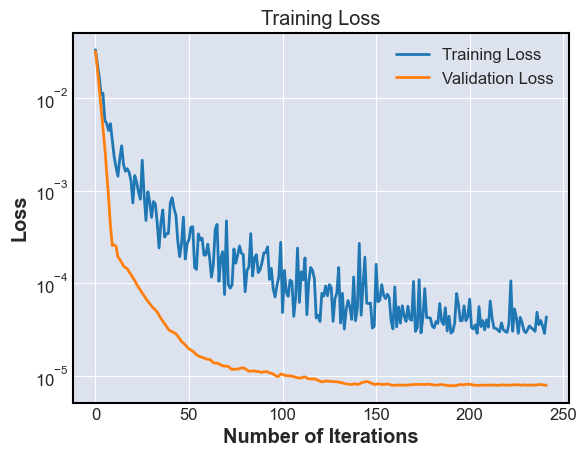

In [992]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
# log scale for y-axis
plt.yscale('log')
plt.legend()
plt.show()

In [993]:
# make predictions
predictions = model.predict(X_test_scaled)

# transform to 2d array
predictions = predictions.flatten()

# calculate the mean squared error
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
# show expected and predicted values as a dataframe
df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions.flatten()})
df

# print(df)

# for each line, add if it is correct or not (just use the sign of the expected and predicted values)
df['Correct'] = np.sign(df['Expected']) == np.sign(df['Predicted'])

# print(df)
# calculate the percentage of correct predictions
correct = df['Correct'].sum()
total = len(df)

percentage = (correct / total) * 100

print(f'Percentage of correct predictions: {percentage:.2f}%: {correct}/{total}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Mean Squared Error: 2.306604876678119e-05
Percentage of correct predictions: 53.85%: 28/52
